In [2]:
import pandas as pd
import numpy as np

In [3]:
drug=pd.read_csv(r"C:\Users\Admin\MSc Applied Statistics SPU\csv file\drug200.csv")

In [5]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
drug["Sex"]=le.fit_transform(drug["Sex"])
drug["BP"]=le.fit_transform(drug["BP"])
drug["Cholesterol"]=le.fit_transform(drug["Cholesterol"])
drug["Drug"]=le.fit_transform(drug["Drug"])

In [10]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [11]:
drug["Drug"].value_counts()

Drug
4    91
3    54
0    23
2    16
1    16
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [28]:
scaler = StandardScaler()
drug[['Age', 'Na_to_K']] = scaler.fit_transform(drug[['Age', 'Na_to_K']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  
drug['Cluster'] = kmeans.fit_predict(drug)

# Show the clustered data
drug.head()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Cluster
0,-1.291591,0,0,0,1.286522,4,0
1,0.162699,1,1,0,-0.415145,2,2
2,0.162699,1,1,0,-0.828558,2,2
3,-0.988614,0,2,0,-1.149963,3,1
4,1.011034,0,1,0,0.271794,4,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


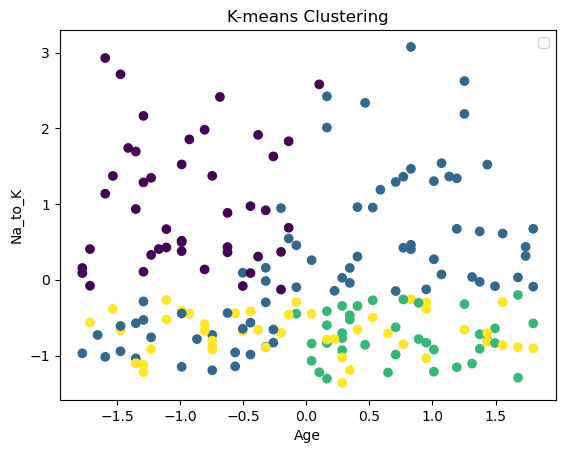

In [29]:
# Plotting the clusters
plt.scatter(drug['Age'],drug['Na_to_K'], c=drug['Cluster'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.title('K-means Clustering')
plt.show()

In [30]:
kmeans.cluster_centers_

array([[-0.93365538,  0.41860465,  0.53488372,  0.58139535,  1.00623718,
         4.        ,  0.        ],
       [ 0.1900911 ,  0.49315068,  1.28767123,  0.46575342,  0.23281921,
         3.65753425,  3.65753425],
       [ 0.73197652,  0.57894737,  1.52631579,  0.5       , -0.75005131,
         2.76315789,  1.        ],
       [-0.03357776,  0.60869565,  0.15217391,  0.41304348, -0.69047938,
         0.65217391,  2.15217391]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


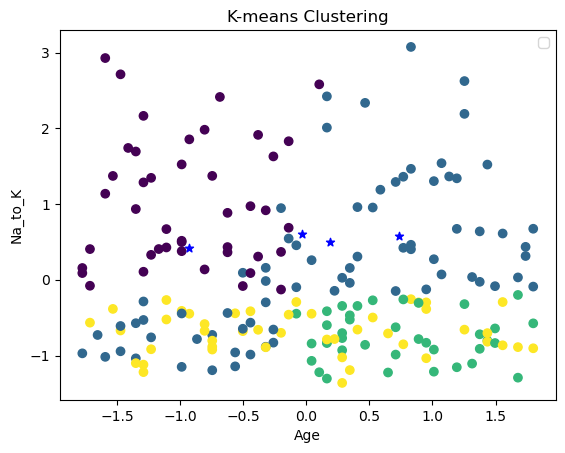

In [32]:
plt.scatter(drug['Age'],drug['Na_to_K'], c=drug['Cluster'])
plt.legend()
plt.xlabel('Age')
plt.ylabel('Na_to_K')
plt.title('K-means Clustering')


plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = "blue", marker = "*")

plt.show()

In [36]:
k_range = range(1, 11)
dist = []
for k in k_range:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_predict(drug[['Age', 'Na_to_K']])
    dist.append((kmeans.inertia_)**0.5)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

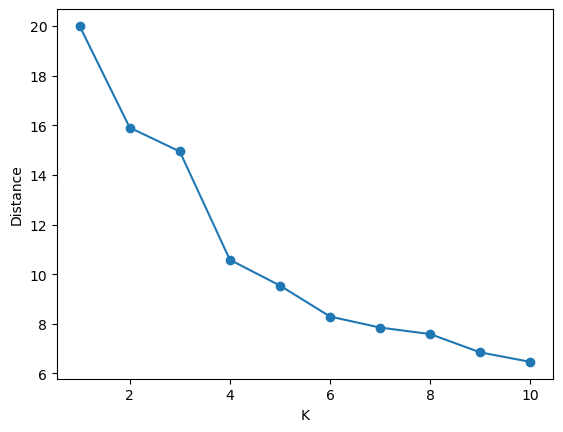

In [37]:
plt.xlabel("K")
plt.ylabel("Distance")
plt.plot(k_range, dist)
plt.scatter(k_range, dist)

###  Interpretation:

- The **elbow point** is where the rate of decrease in the distance slows down significantly (around **K=3** in this plot).  
- This suggests that adding more clusters beyond this point does not improve the model much, as the additional clusters do not contribute significantly to reducing the distance.

#### **Optimal Number of Clusters**:  
- Based on the plot, the optimal number of clusters seems to be **K=3**, where the distance starts to plateau.  
- This is the point where the benefit of adding more clusters diminishes, indicating that further increases in $K$ would not result in substantial improvements.

### Conclusion:
- **K=3** should likely be considered the optimal number of clusters based on the Elbow Method.  
- Beyond this point, increasing $K$ doesn't lead to better clustering results.
